In [26]:
#PyTorch Workflow
import torch 
from torch import nn #nn contains all of PyTorch's neural network building blocks
import matplotlib.pyplot as plt

#check PyTorch version

torch.__version__

'2.0.0'

## 1.DATA PREPARING AND LOADING
Data can be almost anything

In [27]:
#Create *known* parameters , linear regression to make straight line
weight=0.7
bias=0.3 
#create 
start=0
end = 1
step=0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y=weight * X + bias

X[:10],y[:10],len(X),len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [28]:
#splitting data into training and test sets.
train_split = int(0.8*len(X))
X_train ,y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:],y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [29]:
#How can we visualize our data?

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10,7))

    #plot training data in blue
    plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")
    #plot testing data in green
    plt.scatter(test_data,test_labels,c="g",s=4,label="Testing Data")
    #Are there predictions?
    if predictions is not None:
        #plot predicitions if they exist
        plt.scatter(test_data,predictions,c="r",label="Predictions")

    #show the legend
    plt.legend(prop={"size": 14})

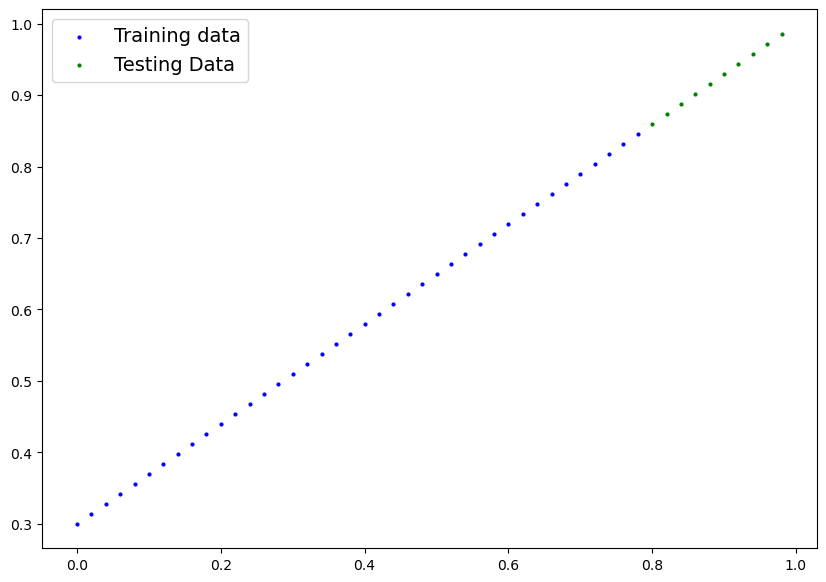

In [30]:
plot_predictions()

In [31]:
#Build first model

In [32]:
class LinearRegressionModel(nn.Module): # almost everything in PyTorch inherits from nn.module
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.randn(1,
                                              requires_grad=True,
                                              dtype=torch.float))
        self.bias=nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))
        
        #forward method to define the computation in the model

    def forward(self,x:torch.Tensor) ->torch.Tensor: #"x" is the input data
        return self.weights * x + self.bias

In [33]:
#Checking contents of the model
#Create a random seed
torch.manual_seed(42)

# Create an instance of the model(this is a subclass of nn.module)

model_0 = LinearRegressionModel()

#Check the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [34]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [35]:
model_0.weights,model_0.bias,weight,bias

(Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True),
 0.7,
 0.3)

In [36]:
#MAKE PREDICTIONS WITH MODEL,inference mode is faster
with torch.inference_mode():
    y_preds=model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

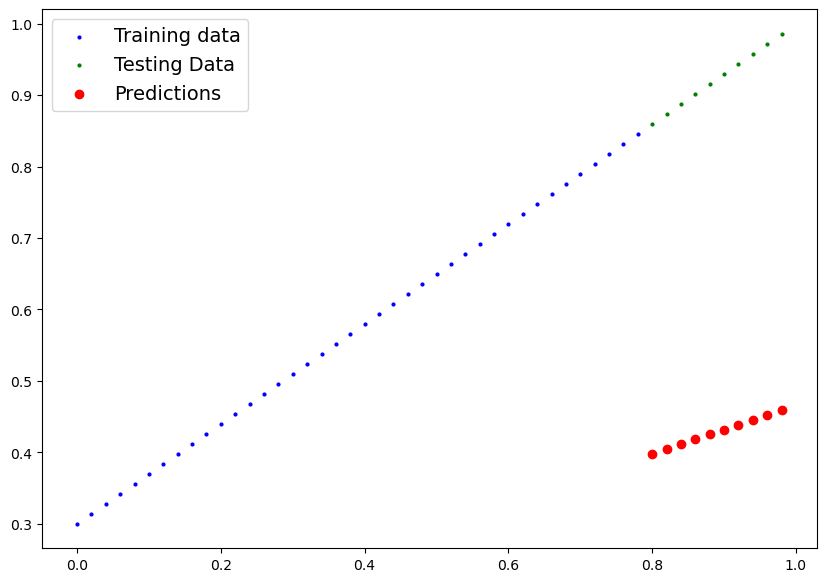

In [37]:
plot_predictions(predictions=y_preds)

In [41]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01) #lr = learning rate

In [42]:
loss_fn,optimizer

(L1Loss(), torch.optim.sgd.SGD)